In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
datos = pd.date_range(start='2023-01-01', periods=252,freq='B') #252 dias habiles en un año
np.random.seed(42)
precios = np.random.lognormal(mean=0.0005, sigma=0.01, size=len(datos))*100

#Crear un dataframe con los datos
df = pd.DataFrame({'Fecha': datos, 'Precio': precios})
#Setear el indice del dataframe
df.set_index('Fecha', inplace=True)

In [6]:
df.head()

,Precio
Fecha,
2023-01-02,100.548211
2023-01-03,99.911775
2023-01-04,100.700128
2023-01-05,101.585467
2023-01-06,99.816016


In [8]:
#Calcular los retornos de los precios
df['Retorno_Diario'] = df['Precio'].pct_change()
display(df)

,Precio,Retorno_Diario
Fecha,,
2023-01-02,100.548211,NaN
2023-01-03,99.911775,-0.006330
2023-01-04,100.700128,0.007890
2023-01-05,101.585467,0.008792
2023-01-06,99.816016,-0.017418
...,...,...
2023-12-13,99.398487,-0.001782
2023-12-14,101.832034,0.024483
2023-12-15,100.456018,-0.013513


In [9]:
#Calcular la media movil de los precios
df['Media_Movil_20'] = df['Precio'].rolling(window=20).mean()
df['Media_Movil_50'] = df['Precio'].rolling(window=50).mean()

display(df)

,Precio,Retorno_Diario,Media_Movil_20,Media_Movil_50
Fecha,,,,
2023-01-02,100.548211,NaN,NaN,NaN
2023-01-03,99.911775,-0.006330,NaN,NaN
2023-01-04,100.700128,0.007890,NaN,NaN
2023-01-05,101.585467,0.008792,NaN,NaN
2023-01-06,99.816016,-0.017418,NaN,NaN
...,...,...,...,...
2023-12-13,99.398487,-0.001782,99.942721,100.141703
2023-12-14,101.832034,0.024483,100.067477,100.176178
2023-12-15,100.456018,-0.013513,100.053665,100.207039


In [11]:
#Rendimiento calculado 
df['Rendimiento_Calculado'] = (1 - df['Retorno_Diario']).cumprod()
display(df)

,Precio,Retorno_Diario,Media_Movil_20,Media_Movil_50,Rendimiento_Calculado
Fecha,,,,,
2023-01-02,100.548211,NaN,NaN,NaN,NaN
2023-01-03,99.911775,-0.006330,NaN,NaN,1.006330
2023-01-04,100.700128,0.007890,NaN,NaN,0.998389
2023-01-05,101.585467,0.008792,NaN,NaN,0.989612
2023-01-06,99.816016,-0.017418,NaN,NaN,1.006849
...,...,...,...,...,...
2023-12-13,99.398487,-0.001782,99.942721,100.141703,0.964323
2023-12-14,101.832034,0.024483,100.067477,100.176178,0.940714
2023-12-15,100.456018,-0.013513,100.053665,100.207039,0.953425


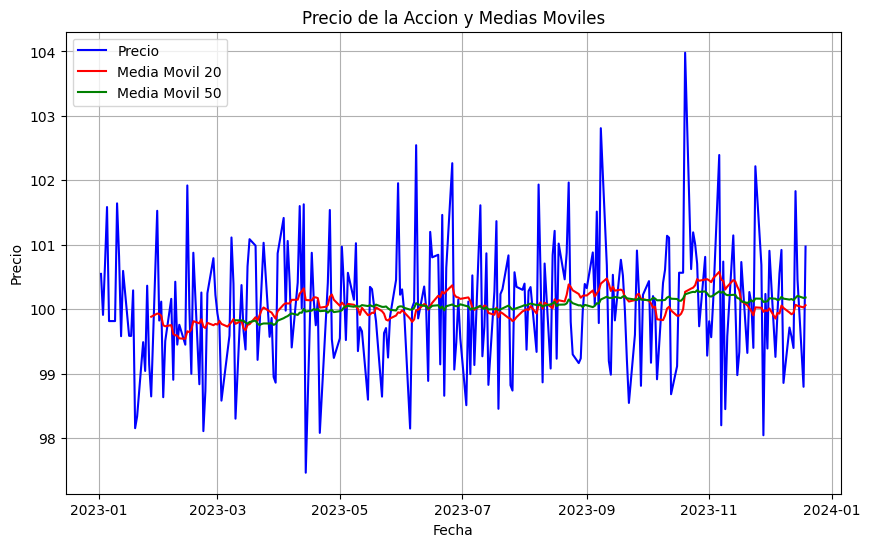

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Precio'], label='Precio', color='blue')
plt.plot(df.index, df['Media_Movil_20'], label='Media Movil 20', color='red')
plt.plot(df.index, df['Media_Movil_50'], label='Media Movil 50', color='green')
plt.title('Precio de la Accion y Medias Moviles')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

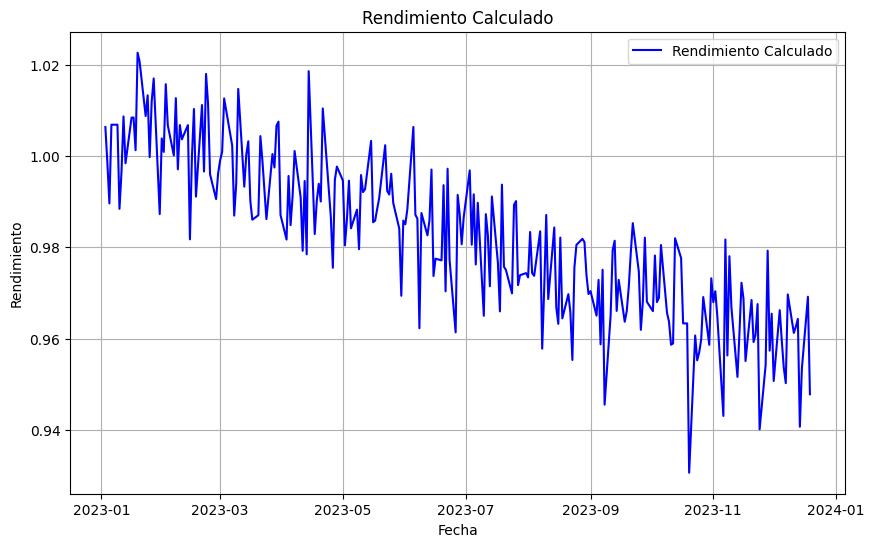

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Rendimiento_Calculado'], label='Rendimiento Calculado', color='blue')
plt.title('Rendimiento Calculado')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento')
plt.legend()
plt.grid(True)
plt.show()